In [80]:
import pandas as pd

# Load dataset
df = pd.read_csv('Netflix_titles.csv')  # Replace with your actual filename

# View first few rows
print(df.head())

# Basic info about the dataset
print(df.info())

# Summary statistics for numeric columns
print(df.describe())


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [11]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [12]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f'Duplicate records: {duplicate_count}')

# Drop duplicates if needed
df = df.drop_duplicates()


Duplicate records: 0


In [13]:
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style='whitegrid')



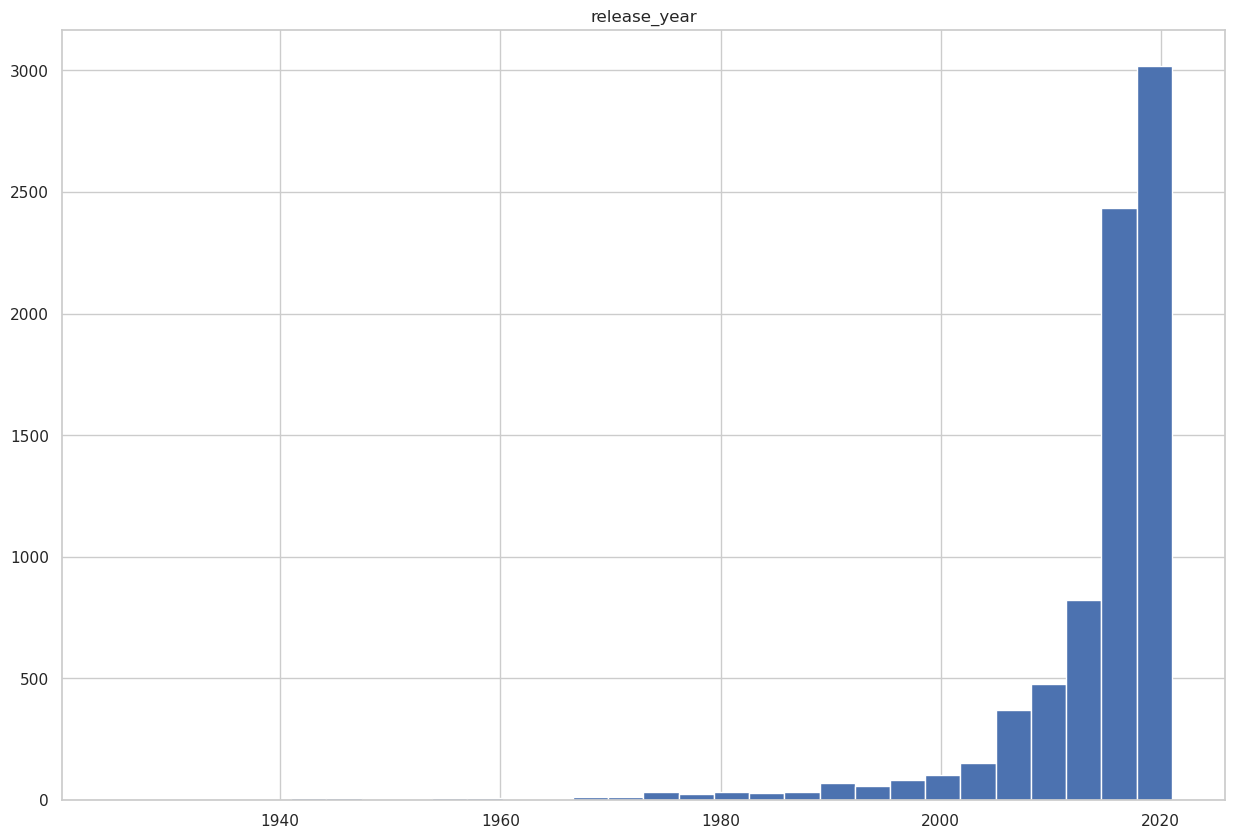

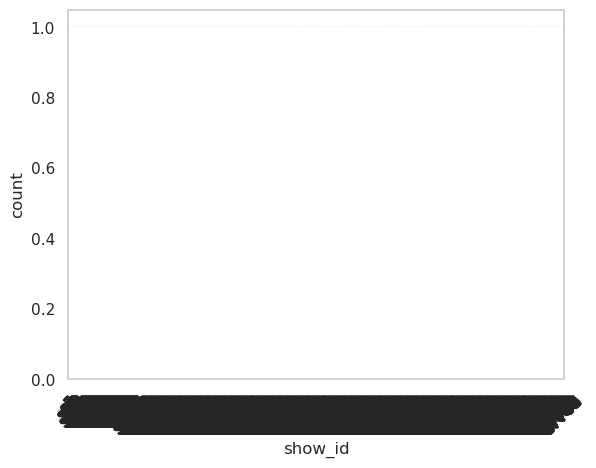

In [15]:
# Histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Count plot for categorical column
sns.countplot(x='show_id', data=df)
plt.xticks(rotation=45)
plt.show()


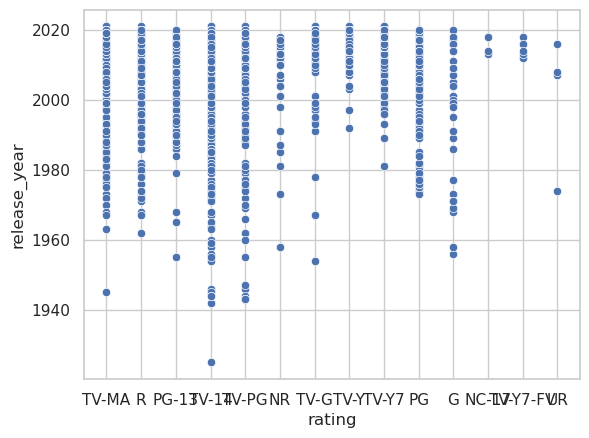

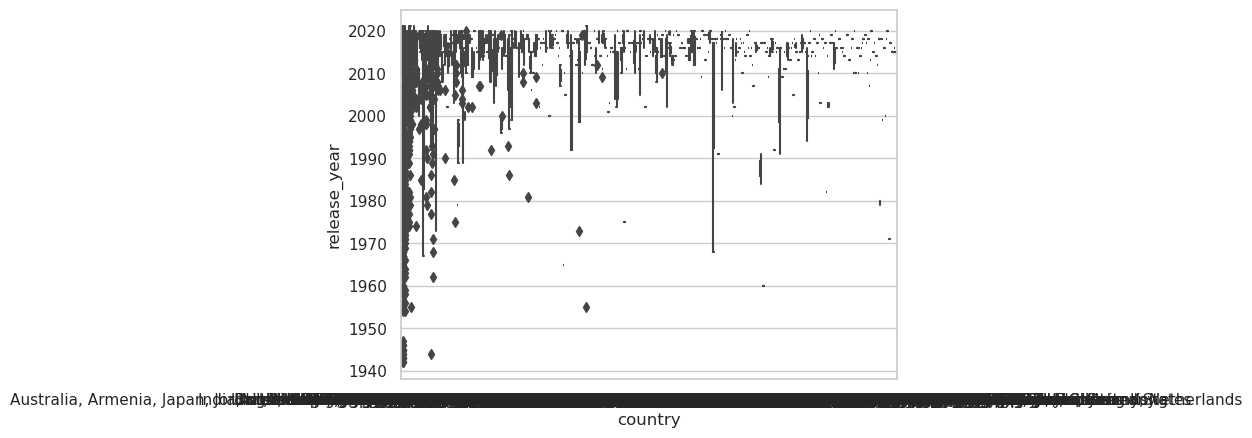

In [16]:
# Scatter plot
sns.scatterplot(x='rating', y='release_year', data=df)
plt.show()

# Box plot to compare categories with numeric values
sns.boxplot(x='country', y='release_year', data=df)
plt.show()


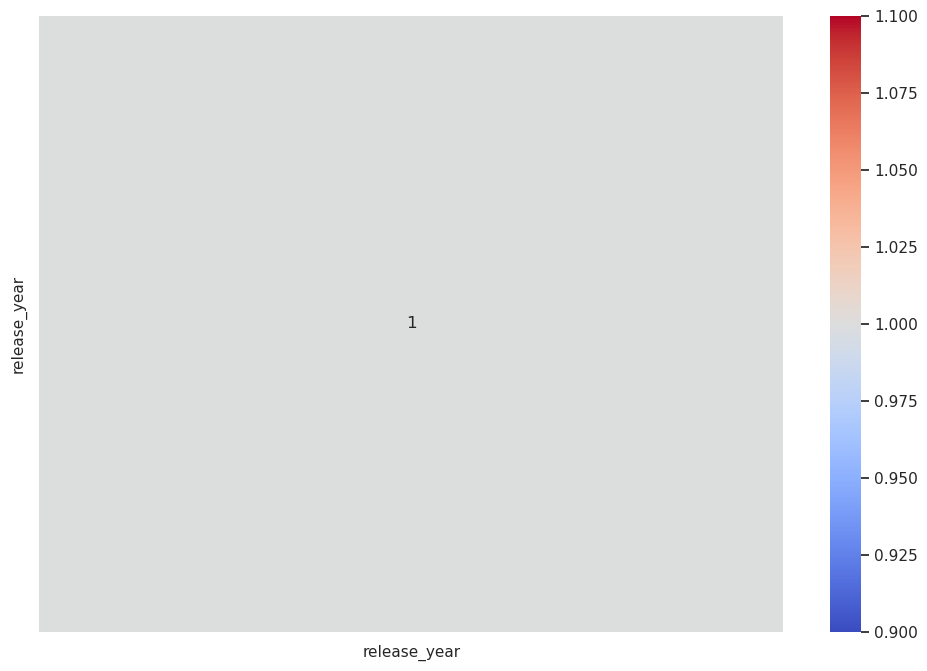

In [17]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Netflix_titles.csv')

# Print the initial count of missing values for each column
print(df.isnull().sum())

# Strategy 1: Fill missing text fields with 'Unknown'
# Corrected column name 'Director' (from 'director' if it was lowercase before)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

print("\nAfter filling missing values:")
# Print the count of missing values again to confirm changes
print(df.isnull().sum())
# Display the first few rows of the DataFrame to see the filled values
print(df.head())



show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

After filling missing values:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64
  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla

In [19]:
import pandas as pd


df = pd.read_csv('Netflix_titles.csv')

# Check if 'type' and 'rating' columns exist before attempting to one-hot encode
columns_to_encode = []
if 'type' in df.columns:
    columns_to_encode.append('type')
if 'rating' in df.columns:
    columns_to_encode.append('rating')

if columns_to_encode:
    df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
else:
    print("Columns 'type' and 'rating' not found in the DataFrame. No one-hot encoding performed for these columns.")

# Rest of your code
# Split 'listed_in' multi-label column
# Corrected line: If 'listed_in' does not exist, create it as a Series of empty strings.
if 'listed_in' not in df.columns:
    df['listed_in'] = ''  # Initialize the column with empty strings if it doesn't exist

df['listed_in'] = df['listed_in'].fillna('') # Now fillna can be called on the Series

# Fix is here: Removed the extra closing parenthesis
print(df.head())



  show_id  title           director  \
0      s1     3%                NaN   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year   duration  \
0    August 14, 2020          2020  4 Seasons   
1  December 23, 2016          2016     93 min   
2  December 20, 2018          2011     78 min   
3  November 16, 2017          2009     80 min   
4    January 1, 2020          2008    123 min   

                                           

In [50]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
import re

# Step 1: Load the dataset
df = pd.read_csv('Netflix_titles.csv')

# Step 2: Convert 'release_year' to numeric (in case of non-numeric issues)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Step 3: Clean and convert 'duration' using regex
def parse_duration(duration):
    if pd.isna(duration):
        return 0
    match = re.search(r'(\d+)', str(duration))
    return int(match.group(1)) if match else 0

df['duration_clean'] = df['duration'].apply(parse_duration)

# Step 4: Drop rows with NaNs or zero durations (optional but recommended)
df = df.dropna(subset=['release_year'])
df = df[df['duration_clean'] > 0]

# Step 5: Scale the numerical features
scaler = StandardScaler()
df[['release_year_scaled', 'duration_scaled']] = scaler.fit_transform(
    df[['release_year', 'duration_clean']]
)

# Optional check
print(df[['release_year', 'duration_clean', 'release_year_scaled', 'duration_scaled']].head())


   release_year  duration_clean  release_year_scaled  duration_scaled
0          2020               4             0.692878        -1.278234
1          2016              93             0.236092         0.468664
2          2011              78            -0.334890         0.174243
3          2009              80            -0.563284         0.213499
4          2008             123            -0.677480         1.057505


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Fill missing values in the 'description' column
df['description'] = df['description'].fillna('')

# Step 2: Initialize the TF-IDF vectorizer (limit to top 100 words)
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Step 3: Fit and transform the 'description' column
tfidf_matrix = tfidf.fit_transform(df['description'])

# Step 4: Convert the resulting sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Step 5: Concatenate TF-IDF features with the original DataFrame
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# Step 6: Optionally drop the original 'description' column
df.drop('description', axis=1, inplace=True)

# Optional: Inspect the new columns
print(df.columns[-10:])  # Show last 10 columns (should be TF-IDF words)


Index(['war', 'way', 'wife', 'woman', 'women', 'work', 'world', 'year',
       'years', 'young'],
      dtype='object')


In [22]:
print(df.shape)
print(df.head())


(7787, 114)
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  ...  war  way  wife  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...  0.0  0.0   0.0   
1  December 23, 2016          2016  TV-MA     93 min  ...  0.0  0.0   0.0   
2  December 20, 2018          2011      R

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# --- IMPORTANT: Replace this placeholder with your actual DataFrame loading code ---
# For demonstration, let's create a sample DataFrame that mimics the issue
# and then shows the fix.

df = pd.read_csv('Netflix_titles.csv')

# --- Original problematic code (commented out) ---
# mlb = MultiLabelBinarizer()
# one_hot_encoded_data = mlb.fit_transform(df['genres']) # This line caused the KeyError
# genre_column_names = mlb.classes_

# --- Corrected code ---

mlb = MultiLabelBinarizer()

# Step 1: Fit and transform the CORRECT column.
# Let's assume you found out the column is actually named 'listed_in'
one_hot_encoded_data = mlb.fit_transform(df['listed_in']) # <--- FIX IS HERE: Changed 'genres' to 'listed_in'

# Step 2: Get the class names (your genre names)
genre_column_names = mlb.classes_

print("DataFrame head:\n", df.head())
print("\nDataFrame columns:", df.columns.tolist()) # Shows you the actual columns

print("\nOne-hot encoded data shape:", one_hot_encoded_data.shape)
print("One-hot encoded data (first 5 rows):\n", one_hot_encoded_data[:5])
print("\nGenre column names (from MultiLabelBinarizer):\n", genre_column_names)

# You can also create a new DataFrame with the one-hot encoded genres
genres_df = pd.DataFrame(one_hot_encoded_data, columns=genre_column_names, index=df.index)
print("\nNew DataFrame with one-hot encoded genres:\n", genres_df.head())



DataFrame head:
   show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13  

In [24]:

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Sample DataFrame (replace with your actual df and genre column)
# df = pd.read_csv('Netflix_titles.csv') # Uncomment and modify if using a CSV
# For demonstration, let's create a sample DataFrame as seen in the image's context

df = pd.read_csv('Netflix_titles.csv')


# Assuming 'listed_in' is the column with lists of genres
mlb = MultiLabelBinarizer()
one_hot_genres = mlb.fit_transform(df['listed_in'])

# Create a DataFrame from the one-hot encoded genres
genre_df = pd.DataFrame(one_hot_genres, columns=mlb.classes_)

# Concatenate the new genre DataFrame with your original df
# Ensure the index aligns if df has been manipulated
df = pd.concat([df, genre_df], axis=1)

# Now, you can safely use mlb.classes_
# Sum across all one-hot encoded genre columns
genre_columns = mlb.classes_
df['listed_in_count'] = df[genre_columns].sum(axis=1)
print(df)




     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

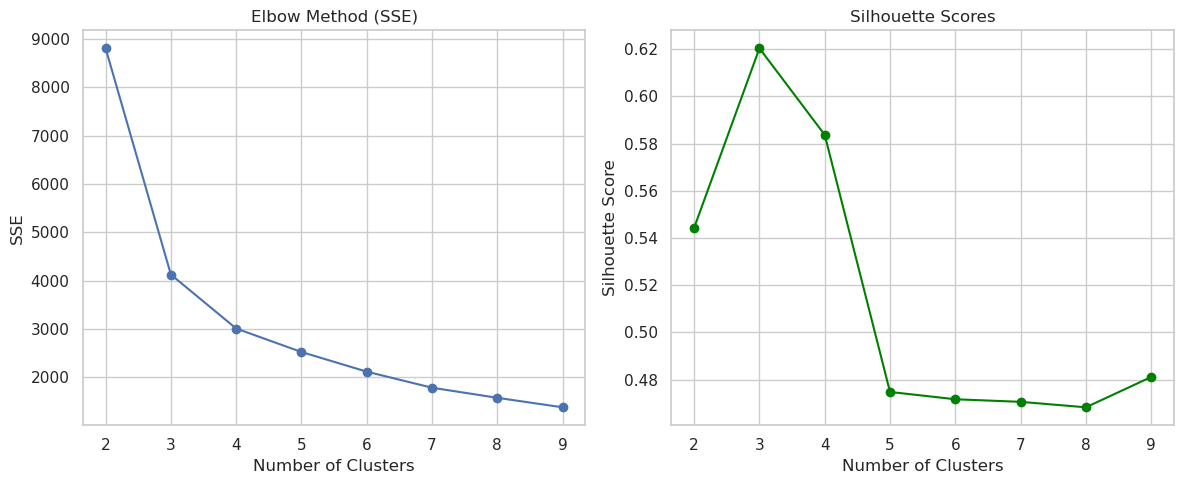

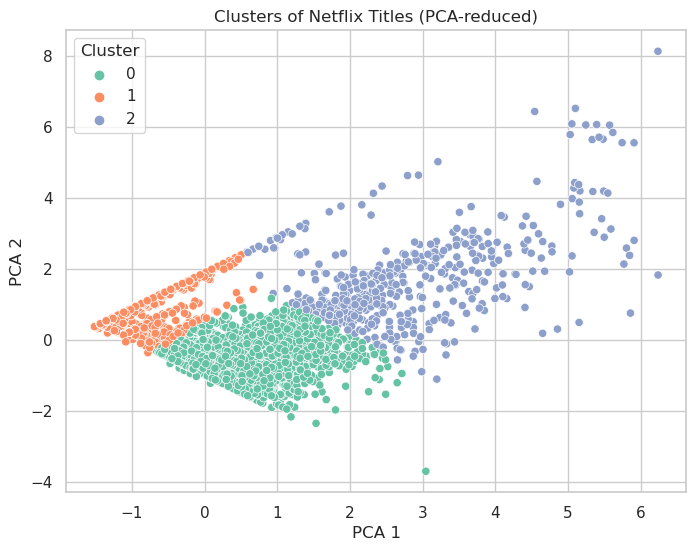

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv('Netflix_titles.csv')

# Handle 'release_year'
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['release_year'].fillna(0, inplace=True)

# Parse 'duration' column
def parse_duration(duration):
    match = re.search(r'(\d+)', str(duration))
    return int(match.group(1)) if match else 0

df['duration_clean'] = df['duration'].apply(parse_duration)

# Drop rows with 0 duration or year for better clustering
df = df[(df['release_year'] > 0) & (df['duration_clean'] > 0)]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['release_year', 'duration_clean']])
df[['release_year_scaled', 'duration_scaled']] = X_scaled

# PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow method to find optimal number of clusters
sse = []
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot SSE and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Final Clustering with optimal k (say k=3 based on elbow/silhouette)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_pca)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title('Clusters of Netflix Titles (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


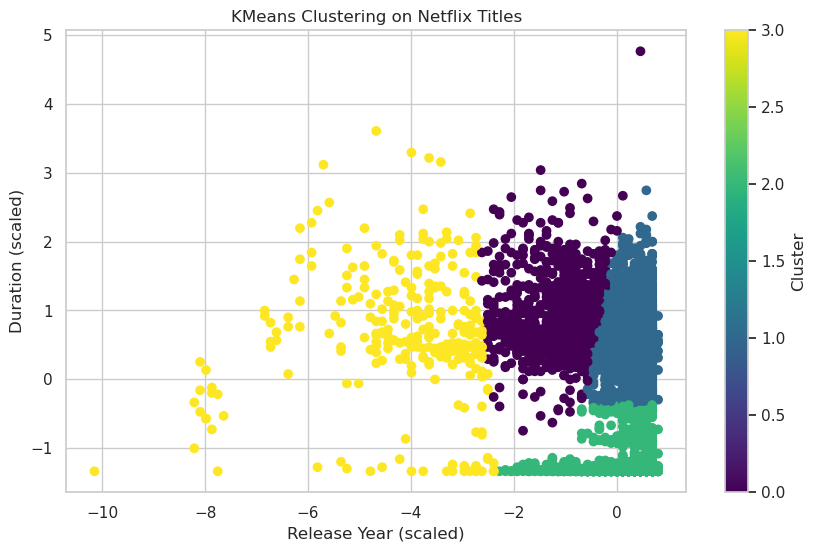

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Define the input for clustering
X_clustering = df[['release_year_scaled', 'duration_scale']]

# 2. Fit KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)

# 3. Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year_scaled'], df['duration_scale'], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering on Netflix Titles')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Duration (scaled)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



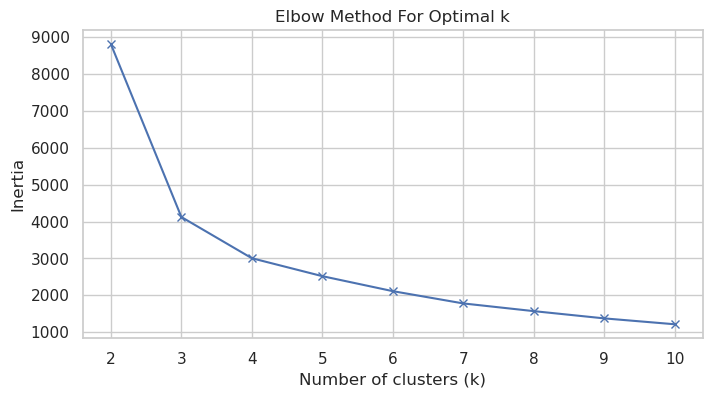

In [27]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4' # Replace 4 with your desired number of from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42) # Added random_state for reproducibility
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


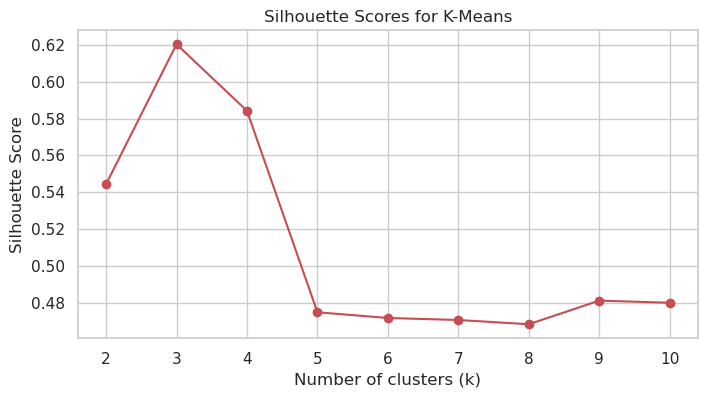

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.show()


In [29]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)




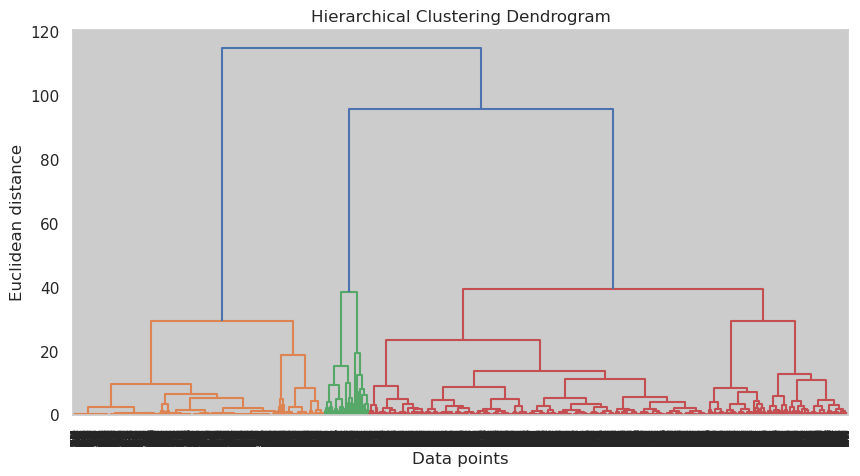

In [30]:
# Import matplotlib.pyplot, which is necessary for plotting functions like plt.figure, plt.show, etc.
import matplotlib.pyplot as plt

# Fix: 'From' should be 'from'
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()


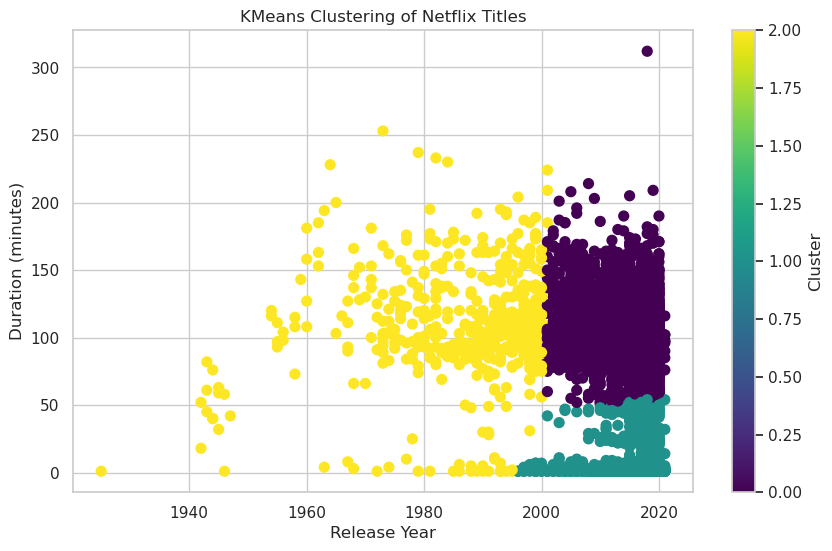

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('Netflix_titles.csv')

# Step 2: Extract numeric feature(s)
# Make sure 'release_year' is in numeric format (should be)
# Extract 'duration_minutes' from 'duration' column if available
# Movies have duration like '90 min', TV Shows have '1 Season', '2 Seasons'
# We'll extract numeric minutes where possible

# Create a new column with only numeric duration
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Step 3: Select features for clustering
features_for_scaling = ['release_year', 'duration_minutes']

# Drop rows with NaNs in selected features
df_clean = df[features_for_scaling].dropna()

# Step 4: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Step 5: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Step 6: Assign cluster labels back to the original dataframe (filtered)
df_clean['cluster'] = clusters

# Step 7: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['release_year'], df_clean['duration_minutes'], c=df_clean['cluster'], cmap='viridis', s=50)
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('KMeans Clustering of Netflix Titles')
plt.colorbar(label='Cluster')
plt.show()


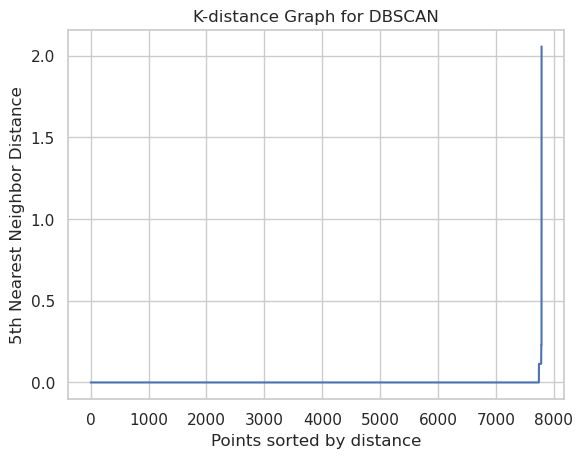

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Determine optimal epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot k-distance graph
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


In [33]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust eps based on graph
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)


In [34]:
import pandas as pd
# Load your dataset into a pandas DataFrame
df = pd.read_csv('Netflix_titles.csv') # Replace with your actual file name

from sklearn.cluster import DBSCAN # Make sure this is run
dbscan = DBSCAN(eps=1.5, min_samples=5)
# Make sure X_scaled is defined before this line
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score

labels_db = df['dbscan_cluster']
if len(set(labels_db)) > 1:
    # --- FIX STARTS HERE ---
    # The actual code for silhouette score calculation needs to be indented here
    # Remember from a previous attempt:
    print('Silhouette Score (DBSCAN):', silhouette_score(X_scaled, labels_db))
    # --- FIX ENDS HERE ---
else:
    print("DBSCAN produced only 1 cluster.")



Silhouette Score (DBSCAN): 0.9080558274158033


In [35]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try multiple k values
best_score = -1
best_k = 0
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k} --> Silhouette Score = {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k

# Final optimized model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)


k = 2 --> Silhouette Score = 0.8166
k = 3 --> Silhouette Score = 0.7289
k = 4 --> Silhouette Score = 0.6691
k = 5 --> Silhouette Score = 0.5708
k = 6 --> Silhouette Score = 0.5729
k = 7 --> Silhouette Score = 0.6008
k = 8 --> Silhouette Score = 0.5976
k = 9 --> Silhouette Score = 0.6010
k = 10 --> Silhouette Score = 0.5997


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('Netflix_titles.csv')

# Scale the data
X = df.select_dtypes(include=[np.number])  # selects only numeric columns
X_scaled = scaler.fit_transform(X)


# Determine number of clusters (set manually or calculate)
best_k = 4

# Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    try:
        model = AgglomerativeClustering(n_clusters=best_k, linkage=method)
        labels = model.fit_predict(X_scaled)
        print(f"Linkage: {method} succeeded. Labels: {np.unique(labels)}")
    except Exception as e:
        print(f"Linkage: {method} failed due to: {e}")


Linkage: ward succeeded. Labels: [0 1 2 3]
Linkage: complete succeeded. Labels: [0 1 2 3]
Linkage: average succeeded. Labels: [0 1 2 3]
Linkage: single succeeded. Labels: [0 1 2 3]


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 1. Load your dataset
df = pd.read_csv('Netflix_titles.csv')  # Replace with your actual file name

# 2. Select only numeric columns
X = df.select_dtypes(include=[np.number])

# 3. Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply DBSCAN
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# 5. Evaluate with silhouette score (excluding noise: label -1)
unique_labels = set(labels)
if len(unique_labels - {-1}) > 1:
    mask = labels != -1
    score = silhouette_score(X_scaled[mask], labels[mask])
    print(f"DBSCAN: eps={eps}, min_samples={min_samples} --> Silhouette Score = {score:.4f}")


DBSCAN: eps=0.5, min_samples=5 --> Silhouette Score = 0.8842


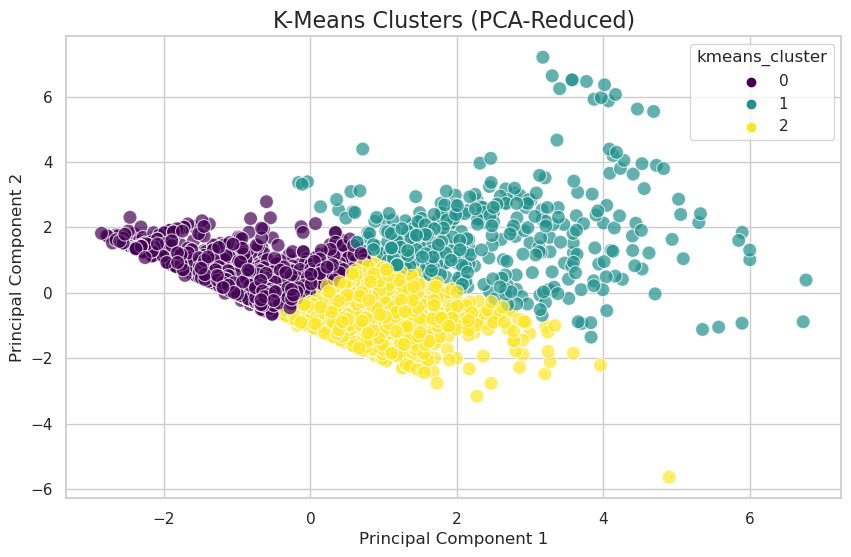

In [58]:
# 1. Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv('Netflix_titles.csv')

# 3. Extract relevant features manually (e.g., convert categorical to numeric)
# Here we use 'release_year' and convert 'duration' if it's in minutes
df = df.copy()
df = df[df['duration'].str.contains('min', na=False)]  # Filter only movies
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Select features
X = df[['release_year', 'duration_minutes']].dropna()

# 4. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
df = df.loc[X.index]  # Align df with X
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 6. Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# 7. Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', palette='viridis', data=df, s=100, alpha=0.7)
plt.title("K-Means Clusters (PCA-Reduced)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.122419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.239594
[t-SNE] KL divergence after 500 iterations: 0.332472


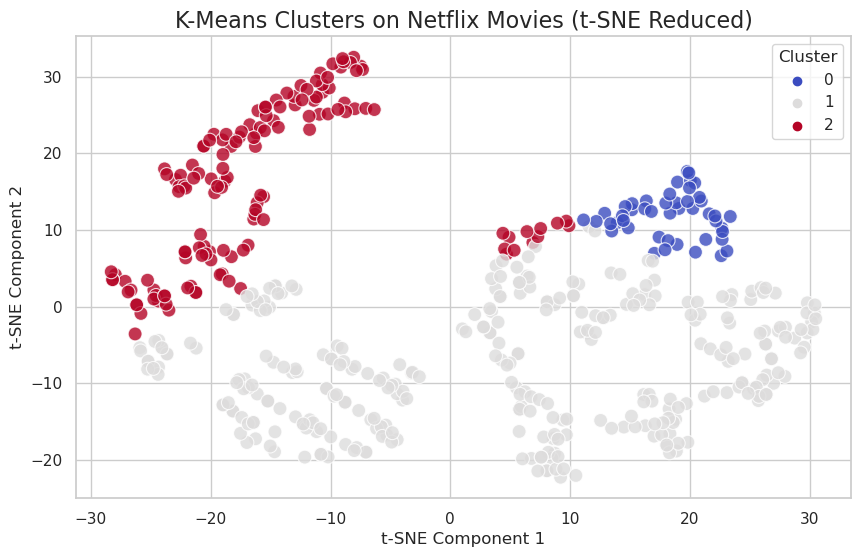

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Netflix_titles.csv')

# Filter only movies
df_movies = df[df['duration'].str.contains('min', na=False)].copy()

# Extract numeric duration
df_movies['duration_minutes'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Use relevant features
df_model = df_movies[['release_year', 'duration_minutes']].dropna().copy()

# OPTIONAL: Use a smaller sample for quick t-SNE testing
df_model = df_model.sample(n=500, random_state=42)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
df_model['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# t-SNE with verbose for progress and smaller perplexity
tsne = TSNE(
    n_components=2,
    perplexity=20,         # Reduce for small data
    n_iter=500,            # Faster convergence
    learning_rate='auto',
    init='pca',
    random_state=42,
    verbose=1              # Show progress
)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE output
df_model['tsne1'] = X_tsne[:, 0]
df_model['tsne2'] = X_tsne[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x='tsne1', y='tsne2', hue='kmeans_cluster', palette='coolwarm', s=100, alpha=0.8)
plt.title("K-Means Clusters on Netflix Movies (t-SNE Reduced)", fontsize=16)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


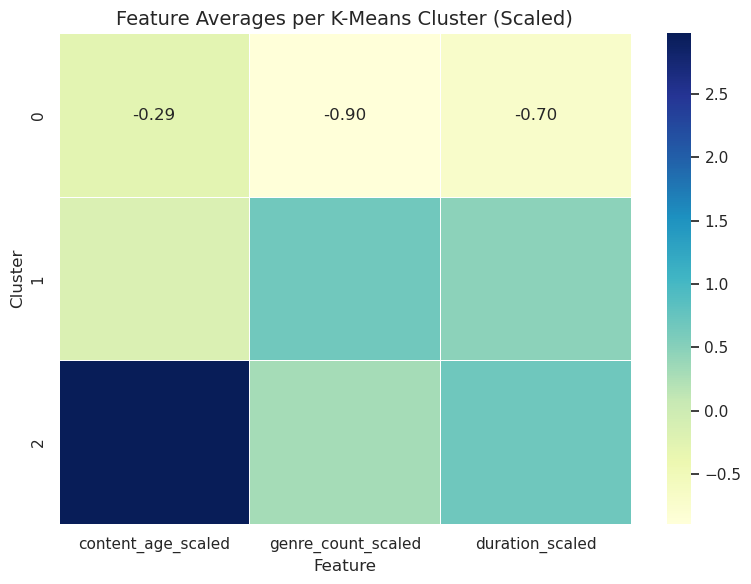

In [81]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Netflix_titles.csv")


df = df[df['duration'].str.contains('min', na=False)].copy()


df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)

df['content_age'] = 2025 - df['release_year']


df['genre_count'] = df['listed_in'].fillna('').apply(lambda x: len(x.split(',')))


df_model = df[['content_age', 'genre_count', 'duration_minutes']].dropna().copy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)


df_model[['content_age_scaled', 'genre_count_scaled', 'duration_scaled']] = X_scaled


kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
df_model['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 10. Calculate average values per cluster (scaled for better comparison)
cluster_means = df_model.groupby('kmeans_cluster')[['content_age_scaled', 'genre_count_scaled', 'duration_scaled']].mean()

# 11. Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Averages per K-Means Cluster (Scaled)", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.tight_layout()
plt.show()


In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv('Netflix_titles.csv')

df = df[df['duration'].str.contains('min', na=False)].copy()

df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)


df['content_age'] = 2025 - df['release_year']

df['genre_list'] = df['listed_in'].fillna('').apply(lambda x: [genre.strip() for genre in x.split(',')])

unique_genres = sorted({genre for genre_list in df['genre_list'] for genre in genre_list})

for genre in unique_genres:
    df[f'genre_{genre}'] = df['genre_list'].apply(lambda genres: int(genre in genres))

df['genre_count'] = df['genre_list'].apply(len)

feature_cols = ['duration_minutes', 'content_age', 'genre_count'] + [f'genre_{g}' for g in unique_genres]
df_features = df[feature_cols].dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
df_features['kmeans_cluster'] = kmeans.fit_predict(X_scaled)


df = df.loc[df_features.index]
df['kmeans_cluster'] = df_features['kmeans_cluster']


genre_cols = [col for col in df.columns if col.startswith('genre_')]


# Step 1: Ensure genre columns contain only 0/1 values (binary indicators)
df[genre_cols] = df[genre_cols].apply(lambda col: col.map(lambda x: 1 if str(x).strip().lower() in ['1', 'true'] else 0))


# Step 2: Group by clusters and calculate mean of genre presence per cluster
top_genres = df.groupby('kmeans_cluster')[genre_cols].mean().T

# Step 3: Print top genres in each cluster
for cluster in top_genres.columns:
    print(f"\nTop genres in Cluster {cluster}:")
    print(top_genres[cluster].sort_values(ascending=False).head(3))



Top genres in Cluster 0:
genre_Documentaries           0.997462
genre_count                   0.423858
genre_International Movies    0.335025
Name: 0, dtype: float64

Top genres in Cluster 1:
genre_International Movies    0.699271
genre_Dramas                  0.660477
genre_Comedies                0.356432
Name: 1, dtype: float64

Top genres in Cluster 2:
genre_count                       0.597584
genre_Children & Family Movies    0.294342
genre_Comedies                    0.249841
Name: 2, dtype: float64


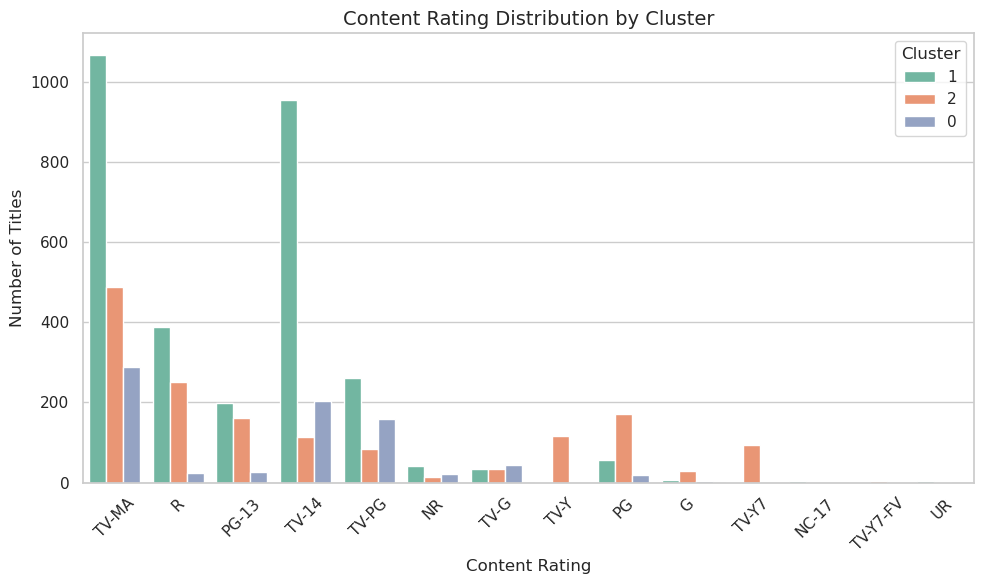

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

df['kmeans_cluster'] = df['kmeans_cluster'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='kmeans_cluster', palette='Set2')

plt.title("Content Rating Distribution by Cluster", fontsize=14)
plt.xlabel("Content Rating", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# Load dataset
df = pd.read_csv('Netflix_titles.csv')

# Select features (customize as needed)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Drop rows with NaN values in selected features
df = df[['release_year', 'duration']].dropna()

# Feature matrix
X = df[['release_year', 'duration']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [98]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Evaluation
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
db_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)
inertia_kmeans = kmeans.inertia_

print("KMeans Results:")
print(f"Silhouette Score: {sil_kmeans:.3f}")
print(f"Davies-Bouldin Index: {db_kmeans:.3f}")
print(f"Inertia: {inertia_kmeans:.2f}")


KMeans Results:
Silhouette Score: 0.584
Davies-Bouldin Index: 0.688
Inertia: 3005.61


In [97]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Ignore noise (-1) for evaluation
mask = labels_dbscan != -1
if len(set(labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    db_dbscan = davies_bouldin_score(X_scaled[mask], labels_dbscan[mask])
else:
    sil_dbscan = db_dbscan = np.nan

print("\nDBSCAN Results:")
print(f"Silhouette Score: {sil_dbscan}")
print(f"Davies-Bouldin Index: {db_dbscan}")



DBSCAN Results:
Silhouette Score: 0.6422549148036434
Davies-Bouldin Index: 0.39034456861732164


In [101]:
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_scaled)

# Evaluation
sil_agg = silhouette_score(X_scaled, labels_agg)
db_agg = davies_bouldin_score(X_scaled, labels_agg)

print("\nAgglomerative Clustering Results:")
print(f"Silhouette Score: {sil_agg:.3f}")
print(f"Davies-Bouldin Index: {db_agg:.3f}")



Agglomerative Clustering Results:
Silhouette Score: 0.493
Davies-Bouldin Index: 0.892


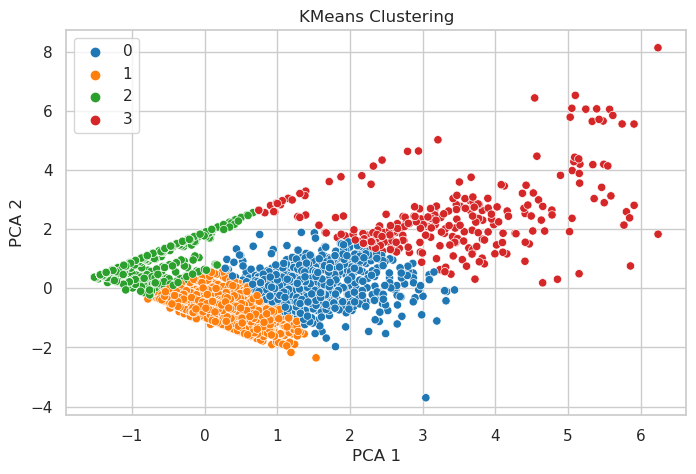

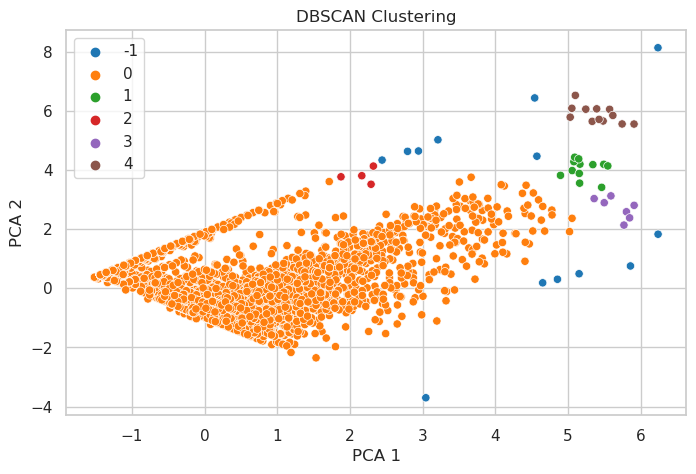

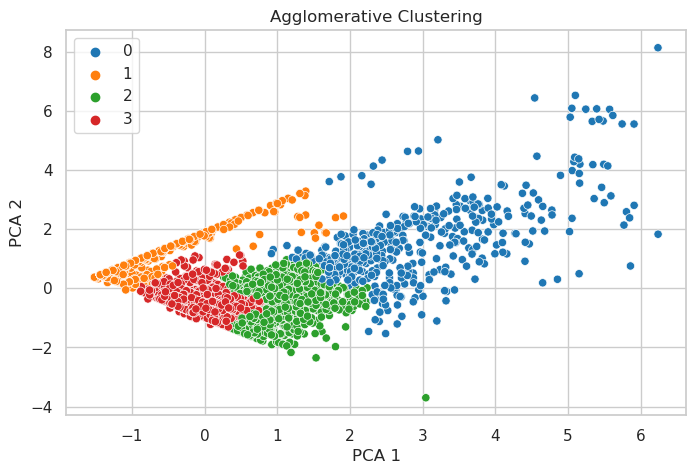

In [102]:
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', legend='full')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Visualize results
plot_clusters(X_pca, labels_kmeans, 'KMeans Clustering')
plot_clusters(X_pca, labels_dbscan, 'DBSCAN Clustering')
plot_clusters(X_pca, labels_agg, 'Agglomerative Clustering')


In [103]:
summary = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN', 'Agglomerative'],
    'Silhouette Score': [sil_kmeans, sil_dbscan, sil_agg],
    'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
    'Inertia': [inertia_kmeans, np.nan, np.nan]
})

print("\nEvaluation Summary:")
print(summary)



Evaluation Summary:
           Model  Silhouette Score  Davies-Bouldin Index      Inertia
0         KMeans          0.584210              0.687792  3005.614268
1         DBSCAN          0.642255              0.390345          NaN
2  Agglomerative          0.492878              0.892152          NaN


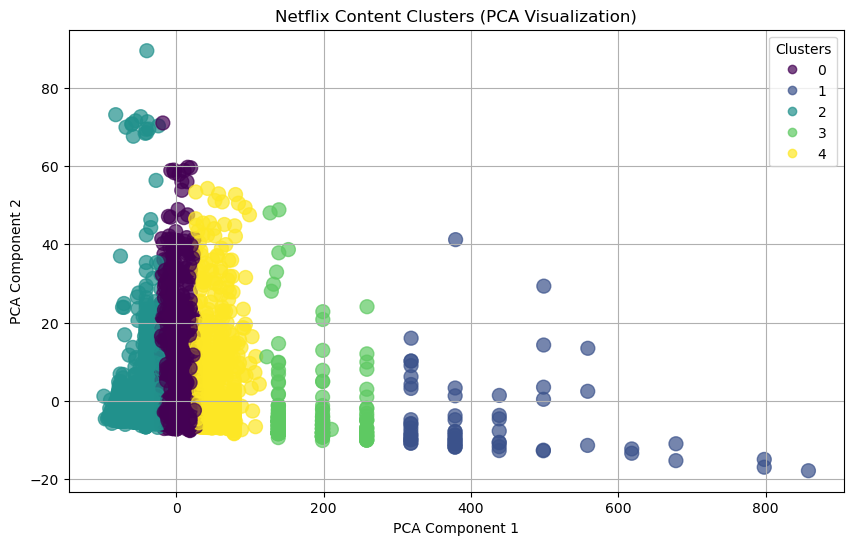

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df = pd.read_csv('Netflix_titles.csv')

# Convert duration to minutes
def extract_duration(row):
    if 'Season' in row:
        return int(row.split(' ')[0]) * 60  # Roughly assume 1 season = 60 mins
    elif 'min' in row:
        return int(row.split(' ')[0])
    return None

df['duration_mins'] = df['duration'].apply(extract_duration)

# Encode categorical features
le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'])

le_rating = LabelEncoder()
df['rating_encoded'] = le_rating.fit_transform(df['rating'])

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['listed_in'].str.split(', '))

# Combine all features into X
X = np.hstack([
    df[['type_encoded', 'rating_encoded', 'release_year', 'duration_mins']].values,
    genre_encoded
])


kmeans = KMeans(n_clusters=5, n_init=10) 

clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("Netflix Content Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
